### Project Title: 

Uncovering Insights: A Data-driven Analysis and Visualization of Boston's Housing Market

Or:

Crunching Data: Exploring Boston's Housing Market with Data Science

****Team:**** Lewis Yung and Joe Fernandez

****Dataset:**** Boston House Price Dataset (housing values in suburbs of Boston)

****Project Description:**** In this project we are going to use concepts learned in COMPSCIX433.3-023 Data Analysis and Scientific Computing on the house prices in the suburbs of Boston, Massachusetts US. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. This data is shared on Kaggle and was originally taken from the UCI Machine Learning Repository. 
Each record in the database describes the house prices in the Boston suburbs. There are 14 attributes that provide relevant information concerning housing values in the suburbs of Boston. We will use NumPy, Pandas, Matplotlib, sklearn, SciPy, and various other data analysis modules to cleanse, transform, and visualize the data.

#### There are 13 continuous attributes (including "class" attribute "MEDV"), and 1 binary-valued attribute. The attributes are:

*	CRIM - per capita crime rate by town
*	ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*	INDUS - proportion of non-retail business acres per town.
*	CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*	NOX - nitric oxides concentration (parts per 10 million)
*	RM - average number of rooms per dwelling
*	AGE - proportion of owner-occupied units built prior to 1940
*	DIS - weighted distances to five Boston employment centres
*	RAD - index of accessibility to radial highways
*	TAX - full-value property-tax rate per \$10,000
*	PTRATIO - pupil-teacher ratio by town
*	B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*	LSTAT - lower status of the population (\%)
*	MEDV - Median value of owner-occupied homes in $1000's

****Original dataset from UCI website:**** https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

****Data on Kaggle.com we will use for Data Analysis:****
https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read the dataset
DF = pd.read_csv('Data/BostonHousing.csv')
# View Data
print(DF.shape)
DF.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# View the type of data we are working with
DF.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [6]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


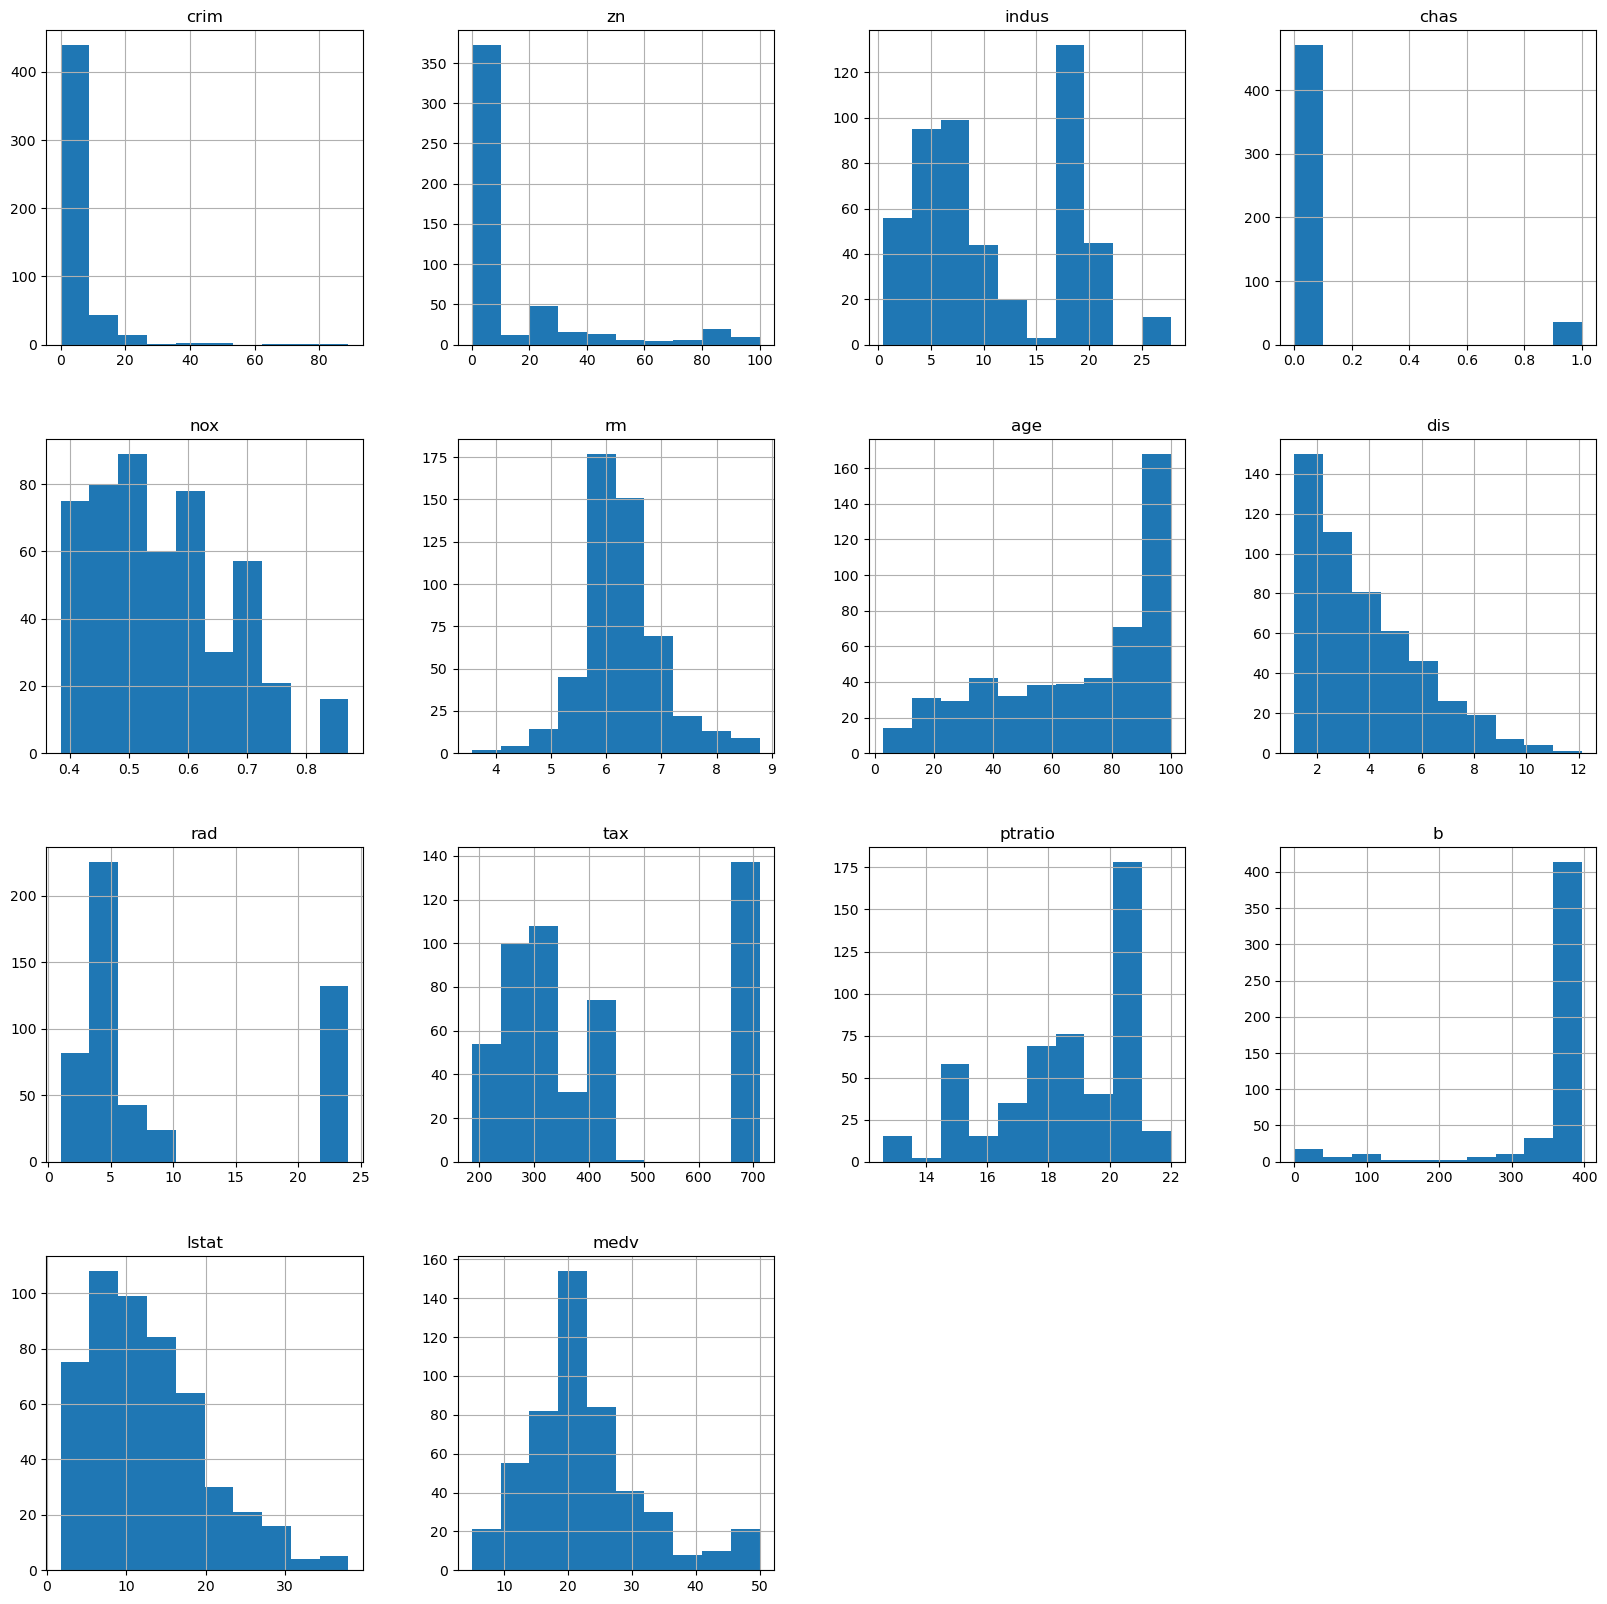

In [9]:
# Data visualization 
DF.hist(figsize = (20,20))
plt.show()

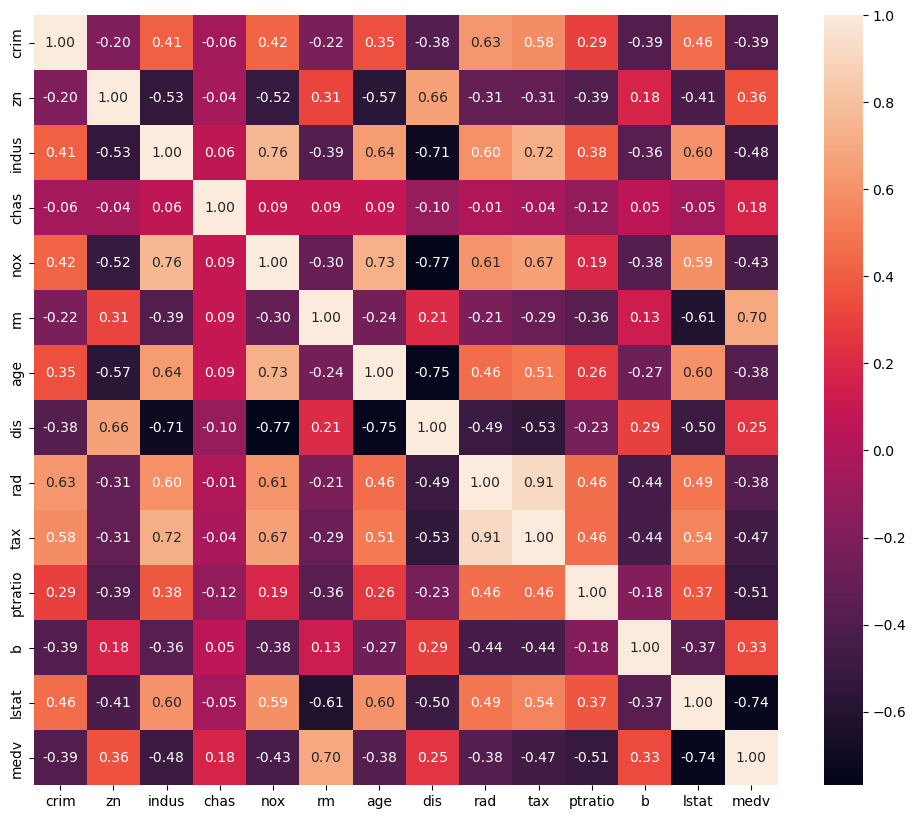

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(DF.corr(),annot=True,fmt='.2f')
plt.show()

#### Graphical Summaries:

Frequency of each variable can be visualized using the histogram plots. A lot of the data do not appear normally distributed and many are also skewed

Correlation between each varible can be visualized using the correlation/heat map. There's a strong negatively  correlation (R^2 = -0.74) between the LSAT (%lower status of the population) and MEDV (Median value of owner-occupied homes in $1000's). Few features that strongly negatively correlated (> 0.75)with DIS (weighted distances to five Boston employment centres) are AGE (proportion of owner-occupied units built prior to 1940), NOX (nitric oxides concentration (parts per 10 million)) and INDUS (proportion of non-retail business acres per town).